In [74]:
import pandas as pd
import re

In [75]:
f = open('group_chat.txt','r',encoding='utf-8')
data = f.read()

In [76]:
print(data)

[23/02/22, 5:41:04 PM] SEC-B Family💟: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.
[23/02/22, 5:55:26 PM] Sanidhya: whi to
sala itna krne k baad bhi 5.4 boli
[23/02/22, 6:09:45 PM] Amit Singh: 🤣
[23/02/22, 6:24:15 PM] Shashank: https://bit.ly/35maFAA

Ye form Aryan se kisne fill krwaya h
[23/02/22, 6:24:29 PM] Shashank: Aur abhi tk sirf 45 responses h
[24/02/22, 9:33:27 AM] Gurashish: Saaala haha kam loot rhe h jo ab aur bharo bc
[24/02/22, 9:33:52 AM] Gurashish: 🤣🤣
[24/02/22, 9:34:52 AM] Shashank: Class m kuch important nhi h na
[24/02/22, 9:35:13 AM] Gurashish: Kuch nhi h
[24/02/22, 9:35:27 AM] ‪+91 97529 31397‬: Do baar to fees bhi lenge ye log
[24/02/22, 9:35:49 AM] Gurashish: Aur aane jaaye ka alag ratta
[24/02/22, 9:35:52 AM] ‪+91 97529 31397‬: Ek baar jaane ka and doosra apne semester ki fees
[24/02/22, 9:36:00 AM] ‪+91 97529 31397‬: Sahi baat bhai
[24/02/22, 9:38:54 AM] Gurashish: Yrrr attendence ke ty

In [77]:
pattern = '\[\d{1,2}/\d{1,2}/\d{2},\s\d{1,2}:\d{2}:\d{2}\s[AP]M\]\s'

In [78]:
messages = re.split(pattern,data)[2:]
messages

['Sanidhya: whi to\nsala itna krne k baad bhi 5.4 boli\n',
 'Amit Singh: 🤣\n',
 'Shashank: https://bit.ly/35maFAA\n\nYe form Aryan se kisne fill krwaya h\n',
 'Shashank: Aur abhi tk sirf 45 responses h\n',
 'Gurashish: Saaala haha kam loot rhe h jo ab aur bharo bc\n',
 'Gurashish: 🤣🤣\n',
 'Shashank: Class m kuch important nhi h na\n',
 'Gurashish: Kuch nhi h\n',
 '\u202a+91\xa097529\xa031397\u202c: Do baar to fees bhi lenge ye log\n',
 'Gurashish: Aur aane jaaye ka alag ratta\n',
 '\u202a+91\xa097529\xa031397\u202c: Ek baar jaane ka and doosra apne semester ki fees\n',
 '\u202a+91\xa097529\xa031397\u202c: Sahi baat bhai\n',
 'Gurashish: Yrrr attendence ke tym pe aaajaana\n',
 'Gurashish: Bencho gwalior amity ki pol khol rha h\n',
 'Gurashish: Record kro is ki statement🤣🤣\n\u200e',
 'Sanidhya: \u200esticker omitted\n',
 'Gurashish: Kisi class h agli\n',
 'Prashant Agrawal: Abey yeh kya chah kya rhe hai\n',
 'Prashant Agrawal: Ek ghante se campus dikha rhe hai\n',
 'Shashank: Wahi dekh k

In [79]:
dates = re.findall(pattern,data)[1:]
dates

['[23/02/22, 5:55:26 PM] ',
 '[23/02/22, 6:09:45 PM] ',
 '[23/02/22, 6:24:15 PM] ',
 '[23/02/22, 6:24:29 PM] ',
 '[24/02/22, 9:33:27 AM] ',
 '[24/02/22, 9:33:52 AM] ',
 '[24/02/22, 9:34:52 AM] ',
 '[24/02/22, 9:35:13 AM] ',
 '[24/02/22, 9:35:27 AM] ',
 '[24/02/22, 9:35:49 AM] ',
 '[24/02/22, 9:35:52 AM] ',
 '[24/02/22, 9:36:00 AM] ',
 '[24/02/22, 9:38:54 AM] ',
 '[24/02/22, 9:45:10 AM] ',
 '[24/02/22, 9:45:22 AM] ',
 '[24/02/22, 9:47:09 AM] ',
 '[24/02/22, 9:48:59 AM] ',
 '[24/02/22, 9:58:39 AM] ',
 '[24/02/22, 9:58:57 AM] ',
 '[24/02/22, 10:00:24 AM] ',
 '[24/02/22, 10:00:43 AM] ',
 '[24/02/22, 10:00:53 AM] ',
 '[24/02/22, 10:01:03 AM] ',
 '[24/02/22, 10:01:33 AM] ',
 '[24/02/22, 10:01:50 AM] ',
 '[24/02/22, 10:02:10 AM] ',
 '[24/02/22, 10:02:14 AM] ',
 '[24/02/22, 10:02:24 AM] ',
 '[24/02/22, 10:02:46 AM] ',
 '[24/02/22, 10:03:31 AM] ',
 '[24/02/22, 10:04:48 AM] ',
 '[24/02/22, 10:05:11 AM] ',
 '[24/02/22, 10:05:26 AM] ',
 '[24/02/22, 10:05:31 AM] ',
 '[24/02/22, 10:05:37 AM] ',
 '[2

In [80]:
df = pd.DataFrame({'user_message':messages,"message_date":dates})
df['message_date']=pd.to_datetime(df['message_date'],format="[%d/%m/%y, %I:%M:%S %p] ")
df.rename(columns = {'message_date':'date'},inplace = True)
df.head(20)
df.shape

(2035, 2)

In [81]:
users=[]
messages=[]
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'],inplace=True)

In [82]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day']=df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minutes'] = df['date'].dt.minute
df['seconds'] = df['date'].dt.second

In [83]:
df.head()

,date,user,message,year,month,day,hour,minutes,seconds
0,2022-02-23 17:55:26,Sanidhya,whi to\nsala itna krne k baad bhi 5.4 boli\n,2022,February,Wednesday,17,55,26
1,2022-02-23 18:09:45,Amit Singh,🤣\n,2022,February,Wednesday,18,9,45
2,2022-02-23 18:24:15,Shashank,https://bit.ly/35maFAA\n\nYe form Aryan se kis...,2022,February,Wednesday,18,24,15
3,2022-02-23 18:24:29,Shashank,Aur abhi tk sirf 45 responses h\n,2022,February,Wednesday,18,24,29
4,2022-02-24 09:33:27,Gurashish,Saaala haha kam loot rhe h jo ab aur bharo bc\n,2022,February,Thursday,9,33,27


In [84]:
df.head(30)

,date,user,message,year,month,day,hour,minutes,seconds
0,2022-02-23 17:55:26,Sanidhya,whi to\nsala itna krne k baad bhi 5.4 boli\n,2022,February,Wednesday,17,55,26
1,2022-02-23 18:09:45,Amit Singh,🤣\n,2022,February,Wednesday,18,9,45
2,2022-02-23 18:24:15,Shashank,https://bit.ly/35maFAA\n\nYe form Aryan se kis...,2022,February,Wednesday,18,24,15
3,2022-02-23 18:24:29,Shashank,Aur abhi tk sirf 45 responses h\n,2022,February,Wednesday,18,24,29
4,2022-02-24 09:33:27,Gurashish,Saaala haha kam loot rhe h jo ab aur bharo bc\n,2022,February,Thursday,9,33,27
5,2022-02-24 09:33:52,Gurashish,🤣🤣\n,2022,February,Thursday,9,33,52
6,2022-02-24 09:34:52,Shashank,Class m kuch important nhi h na\n,2022,February,Thursday,9,34,52
7,2022-02-24 09:35:13,Gurashish,Kuch nhi h\n,2022,February,Thursday,9,35,13
8,2022-02-24 09:35:27,‪+91 97529 31397‬,Do baar to fees bhi lenge ye log\n,2022,February,Thursday,9,35,27
9,2022-02-24 09:35:49,Gurashish,Aur aane jaaye ka alag ratta\n,2022,February,Thursday,9,35,49


In [85]:
#df[df.message == "sticker omitted"]

In [86]:
df.drop(df[df['message']==""].index,inplace=True)

In [87]:
df.reset_index(inplace=True)

In [88]:
df[df['message'].str.contains("omitted")].shape[0] #3-4 ghante lagein iss query ko solve karne mein(count of multimedia messages)

123

In [89]:
df[df['message'].str.contains("omitted")]

,index,date,user,message,year,month,day,hour,minutes,seconds
15,15,2022-02-24 09:47:09,Sanidhya,‎sticker omitted\n,2022,February,Thursday,9,47,9
20,20,2022-02-24 10:00:43,Prashant Agrawal,‎sticker omitted\n,2022,February,Thursday,10,0,43
51,51,2022-02-24 12:06:39,Prashant Agrawal,‎sticker omitted\n,2022,February,Thursday,12,6,39
75,76,2022-02-24 12:36:16,Prashant Agrawal,‎sticker omitted\n,2022,February,Thursday,12,36,16
88,89,2022-02-25 09:30:22,Prashant Agrawal,‎sticker omitted\n,2022,February,Friday,9,30,22
...,...,...,...,...,...,...,...,...,...,...
1846,1859,2022-06-12 16:32:44,‪+91 97529 31397‬,L9 CSE 603 NETWORKING-1.ppt ‎document omitted\n‎,2022,June,Sunday,16,32,44
1847,1860,2022-06-12 16:32:59,‪+91 97529 31397‬,L10 DM-1.ppt ‎document omitted\n‎,2022,June,Sunday,16,32,59
1848,1861,2022-06-12 16:33:13,‪+91 97529 31397‬,L11 xaas-1.ppt ‎document omitted\n,2022,June,Sunday,16,33,13
1867,1880,2022-06-14 17:25:34,‪+91 89592 07443‬,‎sticker omitted\n,2022,June,Tuesday,17,25,34


In [90]:
df.user.unique()

array(['Sanidhya', 'Amit Singh', 'Shashank', 'Gurashish',
       '\u202a+91\xa097529\xa031397\u202c', 'Prashant Agrawal',
       '\u202a+91\xa089592\xa007443\u202c', 'Vikas Narwariya',
       '\u202a+91\xa073547\xa000892\u202c',
       '\u202a+91\xa078986\xa054926\u202c', 'Vaishnavi',
       '\u202a+91\xa077219\xa017839\u202c', 'Mohit✨',
       '\u202a+91\xa074894\xa094743\u202c',
       '\u202a+91\xa070678\xa050490\u202c', 'Vidit Nigam', 'Priya',
       'Ritesh', '\u202a+91\xa079877\xa052579\u202c',
       '\u202a+91\xa06268\xa0133\xa0546\u202c', 'Ricky', 'Tanishka',
       'Ritik', '\u202a+91\xa091\xa011\xa03797\xa077\u202c',
       'Yash Tripathi', 'Raghav Singhal', 'Sharad', 'Sahil', 'PD', 'Pb',
       'Nisha', 'Tushar', '\u202a+91\xa088274\xa051294\u202c',
       '\u202a+91\xa082697\xa023421\u202c',
       '\u202a+91\xa06262\xa0227\xa0080\u202c', 'Sushmit',
       '\u202a+91\xa081712\xa002719\u202c',
       '\u202a+91\xa088398\xa015841\u202c',
       '\u202a+91\xa098466\xa011328\u

In [91]:
df1=df[df['user']=="Momo"]

In [92]:
df1.shape

(0, 10)

In [93]:
df1[df1['message'].str.contains("omitted")].shape[0]

0

In [94]:
from urlextract import URLExtract
extractor = URLExtract()
y = []
for i in df['message']:
    y.extend(extractor.find_urls(i))

In [95]:
len(y)

43

In [96]:
y

['https://bit.ly/35maFAA',
 '1stop.ai',
 'https://youtu.be/L3ZzkOTDins',
 'https://teams.microsoft.com/l/meetup-join/19%3awH34J0kM-lkhDn5UevBGERzNLBOlDYn5EePHAULE_bM1%40thread.tacv2/1646030974718?context=%7b%22Tid%22%3a%228d46a076-d093-416d-a57b-8692cde13bf8%22%2c%22Oid%22%3a%22998c6f0a-5e4e-458c-a1e0-ebaf205ea4ea%22%7d',
 'https://app.joinsuperset.com/company/cognizant/digital-nurture-pro.html',
 'https://docs.google.com/forms/d/e/1FAIpQLSc0Gvha0q57FHdKS7hGcHWhXizwx4BZqldH0qHk5Oe910TZgQ/viewform?usp=pp_url',
 'https://www.instagram.com/reel/Cat70aeDMGi/?utm_medium=copy_link',
 'month.You',
 'https://bit.ly/Internship_placements',
 'https://youtu.be/pCK6prSq8aw',
 'https://youtube.com/playlist?list=PLBlnK6fEyqRgMCUAG0XRw78UA8qnv6jEx',
 'https://youtu.be/JKa05nyUmuQ',
 'https://amityedu96491-my.sharepoint.com/:x:/g/personal/dgbilwal_gwa_amity_edu/ESN0zUzbKX9Ahezfz7JDgmoBR-_bdXxIlaRkPix5o0431g?e=c2y1Br',
 'https://amityedu96491-my.sharepoint.com/:x:/g/personal/dgbilwal_gwa_amity_edu/ESN0

In [97]:
x=df.user.value_counts().head()

In [98]:
name = x.index
counts = x.values

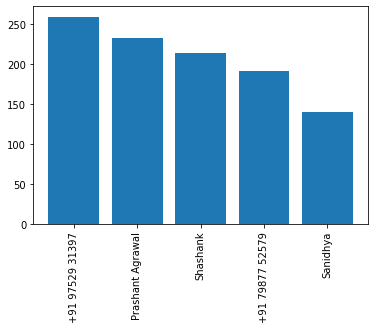

In [99]:
import matplotlib.pyplot as plt
plt.bar(name,counts)
plt.xticks(rotation=90)
plt.show()

In [100]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

,name,percent
0,‪+91 97529 31397‬,12.84
1,Prashant Agrawal,11.55
2,Shashank,10.56
3,‪+91 79877 52579‬,9.47
4,Sanidhya,6.94
5,Amit Singh,5.16
6,Sahil,4.26
7,‪+91 78986 54926‬,4.26
8,‪+91 89592 07443‬,3.87
9,Mohit✨,3.37


In [101]:
#Another_Data = df.copy()

In [102]:
#Another_Data.shape

In [103]:
#Another_Data = df[df['user']!='notification']

In [104]:
# length = len(Another_Data['message'])
# for i in range(length):
#     if "omitted" in Another_Data['message'][i]:
#         Another_Data.drop(i,inplace=True)
        
# Another_Data.reset_index(drop=True,inplace=True)

In [105]:
# del Another_Data['index']

In [106]:
# Another_Data

In [107]:
# f = open('stop_hinglish.txt','r')
# stop_words = f.read()
# print(stop_words)

In [108]:
# words = []

# for i in Another_Data['message']:
#     for j in i.lower().split():
#         if j not in stop_words:
#             words.append(j)

In [109]:
# from collections import Counter
# a=pd.DataFrame(Counter(words).most_common(20))

In [110]:
# Another_Data=df[df['message'].str.contains("omitted")].reset_index()
# Another_Data

In [111]:
# length = len(Another_Data)
# for i in range(length):
#     if "omitted" in Another_Data['message'][i]:
#         Another_Data.drop(i)

In [112]:
# Another_Data.shape

In [113]:
df1 = df[df['user']=="Raghav Singhal"]

In [114]:
df1.head()

,index,date,user,message,year,month,day,hour,minutes,seconds
294,295,2022-02-25 15:31:43,Raghav Singhal,2 se jaana h naa?\n,2022,February,Friday,15,31,43
305,306,2022-02-25 15:35:18,Raghav Singhal,6th sem mein aagye abhi bhi class lena padegi?...,2022,February,Friday,15,35,18
311,312,2022-02-25 15:37:03,Raghav Singhal,Abe yeh Prashant wala sticker 😂😂\n,2022,February,Friday,15,37,3
312,313,2022-02-25 15:37:12,Raghav Singhal,Jabardast bhai\n‎,2022,February,Friday,15,37,12
329,330,2022-02-25 15:41:11,Raghav Singhal,Dhanyawad sir 🔥\n,2022,February,Friday,15,41,11


In [115]:
df1.reset_index(drop=True,inplace=True)

In [116]:
del df1['index']

In [117]:
df1.head()

,date,user,message,year,month,day,hour,minutes,seconds
0,2022-02-25 15:31:43,Raghav Singhal,2 se jaana h naa?\n,2022,February,Friday,15,31,43
1,2022-02-25 15:35:18,Raghav Singhal,6th sem mein aagye abhi bhi class lena padegi?...,2022,February,Friday,15,35,18
2,2022-02-25 15:37:03,Raghav Singhal,Abe yeh Prashant wala sticker 😂😂\n,2022,February,Friday,15,37,3
3,2022-02-25 15:37:12,Raghav Singhal,Jabardast bhai\n‎,2022,February,Friday,15,37,12
4,2022-02-25 15:41:11,Raghav Singhal,Dhanyawad sir 🔥\n,2022,February,Friday,15,41,11


In [118]:
df1.shape

(14, 9)

In [119]:
Another_Data = df1.copy()

In [120]:
Another_Data.shape

(14, 9)

In [121]:
Another_Data.head()

,date,user,message,year,month,day,hour,minutes,seconds
0,2022-02-25 15:31:43,Raghav Singhal,2 se jaana h naa?\n,2022,February,Friday,15,31,43
1,2022-02-25 15:35:18,Raghav Singhal,6th sem mein aagye abhi bhi class lena padegi?...,2022,February,Friday,15,35,18
2,2022-02-25 15:37:03,Raghav Singhal,Abe yeh Prashant wala sticker 😂😂\n,2022,February,Friday,15,37,3
3,2022-02-25 15:37:12,Raghav Singhal,Jabardast bhai\n‎,2022,February,Friday,15,37,12
4,2022-02-25 15:41:11,Raghav Singhal,Dhanyawad sir 🔥\n,2022,February,Friday,15,41,11


In [122]:
length = len(Another_Data)
for i in range(length):
    if "omitted" in Another_Data['message'][i]:
        Another_Data.drop(i, inplace=True)
Another_Data.reset_index(drop=True,inplace=True)

In [123]:
Another_Data.shape

(14, 9)

In [124]:
f = open('stop_hinglish.txt', 'r')
stop_words = f.read()

In [125]:
words = []
for i in Another_Data['message']:
    for j in i.lower().split():
        if j not in stop_words:
            words.append(j)

In [126]:
from collections import Counter

In [127]:
frequency_words = pd.DataFrame(Counter(words).most_common(20))

In [128]:
frequency_words

,0,1
0,class,2
1,😂😂,2
2,‎,2
3,jaana,1
4,naa?,1
5,6th,1
6,sem,1
7,aagye,1
8,lena,1
9,padegi?,1


In [129]:
frequency_words.drop(frequency_words[frequency_words[0] == ""].index, inplace=True)

In [130]:
frequency_words.reset_index(drop=True,inplace=True)

In [131]:
frequency_words

,0,1
0,class,2
1,😂😂,2
2,‎,2
3,jaana,1
4,naa?,1
5,6th,1
6,sem,1
7,aagye,1
8,lena,1
9,padegi?,1


In [132]:
frequency_words[0][14]

'🔥'

In [133]:
# for i in range(len(frequency_words)):
#     if "\\u200e" in frequency_words[0][i]:
#         frequency_words.drop(frequency_words[0][i], inplace=True)
#         frequency_words.reset_index(drop=True,inplace=True)
#         del frequency_words['index']
        

In [134]:
# for i in range(len(frequency_words)):
#     frequency_words[0][i]=frequency_words[0][i].encode("ascii", "ignore")
#     frequency_words[0][i]=frequency_words[0][i].decode()

In [135]:
frequency_words.head(20)

,0,1
0,class,2
1,😂😂,2
2,‎,2
3,jaana,1
4,naa?,1
5,6th,1
6,sem,1
7,aagye,1
8,lena,1
9,padegi?,1


In [136]:
frequency_words

,0,1
0,class,2
1,😂😂,2
2,‎,2
3,jaana,1
4,naa?,1
5,6th,1
6,sem,1
7,aagye,1
8,lena,1
9,padegi?,1


In [137]:
frequency_words= frequency_words[frequency_words[0]!='\u200e']

In [138]:
frequency_words

,0,1
0,class,2
1,😂😂,2
3,jaana,1
4,naa?,1
5,6th,1
6,sem,1
7,aagye,1
8,lena,1
9,padegi?,1
10,prashant,1


In [139]:
import emoji

In [140]:
emojis = []
for i in df.message:
    emojis.extend([message for message in i if message in emoji.UNICODE_EMOJI['en']])

In [141]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,189
1,🤣,182
2,🥳,50
3,👍,23
4,😁,22
...,...,...
74,😌,1
75,🧁,1
76,🔪,1
77,😄,1


In [142]:
df['month_num'] = df['date'].dt.month
df

,index,date,user,message,year,month,day,hour,minutes,seconds,month_num
0,0,2022-02-23 17:55:26,Sanidhya,whi to\nsala itna krne k baad bhi 5.4 boli\n,2022,February,Wednesday,17,55,26,2
1,1,2022-02-23 18:09:45,Amit Singh,🤣\n,2022,February,Wednesday,18,9,45,2
2,2,2022-02-23 18:24:15,Shashank,https://bit.ly/35maFAA\n\nYe form Aryan se kis...,2022,February,Wednesday,18,24,15,2
3,3,2022-02-23 18:24:29,Shashank,Aur abhi tk sirf 45 responses h\n,2022,February,Wednesday,18,24,29,2
4,4,2022-02-24 09:33:27,Gurashish,Saaala haha kam loot rhe h jo ab aur bharo bc\n,2022,February,Thursday,9,33,27,2
...,...,...,...,...,...,...,...,...,...,...,...
2012,2030,2022-07-11 10:05:51,Prashant Agrawal,🤣\n,2022,July,Monday,10,5,51,7
2013,2031,2022-07-11 10:06:11,‪+91 79877 52579‬,🤭\n‎,2022,July,Monday,10,6,11,7
2014,2032,2022-07-11 12:44:48,‪+91 97529 31397‬,VIP-2022-Industry Problem statement-F.pdf • ‎5...,2022,July,Monday,12,44,48,7
2015,2033,2022-07-11 12:45:01,‪+91 97529 31397‬,Kisi ne ye problem statement kar li h kya\n,2022,July,Monday,12,45,1,7


In [143]:
del df['index']

In [146]:
Timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [147]:
time = []
for i in range(Timeline.shape[0]):
    time.append(Timeline['month'][i]+"-"+str(Timeline['year'][i]))

In [148]:
Timeline['time'] = time

In [149]:
Timeline

,year,month_num,month,message,time
0,2022,2,February,579,February-2022
1,2022,3,March,473,March-2022
2,2022,4,April,203,April-2022
3,2022,5,May,304,May-2022
4,2022,6,June,380,June-2022
5,2022,7,July,78,July-2022


In [152]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

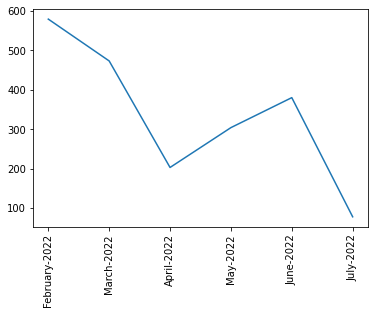

In [156]:
plt.plot(Timeline['time'],Timeline['message'])
plt.xticks(rotation="vertical")

In [158]:
df['dates']=df['date'].dt.date

In [159]:
df

,date,user,message,year,month,day,hour,minutes,seconds,month_num,dates
0,2022-02-23 17:55:26,Sanidhya,whi to\nsala itna krne k baad bhi 5.4 boli\n,2022,February,Wednesday,17,55,26,2,2022-02-23
1,2022-02-23 18:09:45,Amit Singh,🤣\n,2022,February,Wednesday,18,9,45,2,2022-02-23
2,2022-02-23 18:24:15,Shashank,https://bit.ly/35maFAA\n\nYe form Aryan se kis...,2022,February,Wednesday,18,24,15,2,2022-02-23
3,2022-02-23 18:24:29,Shashank,Aur abhi tk sirf 45 responses h\n,2022,February,Wednesday,18,24,29,2,2022-02-23
4,2022-02-24 09:33:27,Gurashish,Saaala haha kam loot rhe h jo ab aur bharo bc\n,2022,February,Thursday,9,33,27,2,2022-02-24
...,...,...,...,...,...,...,...,...,...,...,...
2012,2022-07-11 10:05:51,Prashant Agrawal,🤣\n,2022,July,Monday,10,5,51,7,2022-07-11
2013,2022-07-11 10:06:11,‪+91 79877 52579‬,🤭\n‎,2022,July,Monday,10,6,11,7,2022-07-11
2014,2022-07-11 12:44:48,‪+91 97529 31397‬,VIP-2022-Industry Problem statement-F.pdf • ‎5...,2022,July,Monday,12,44,48,7,2022-07-11
2015,2022-07-11 12:45:01,‪+91 97529 31397‬,Kisi ne ye problem statement kar li h kya\n,2022,July,Monday,12,45,1,7,2022-07-11


In [161]:
Daily_Timeline = df.groupby('dates').count()['message'].reset_index()

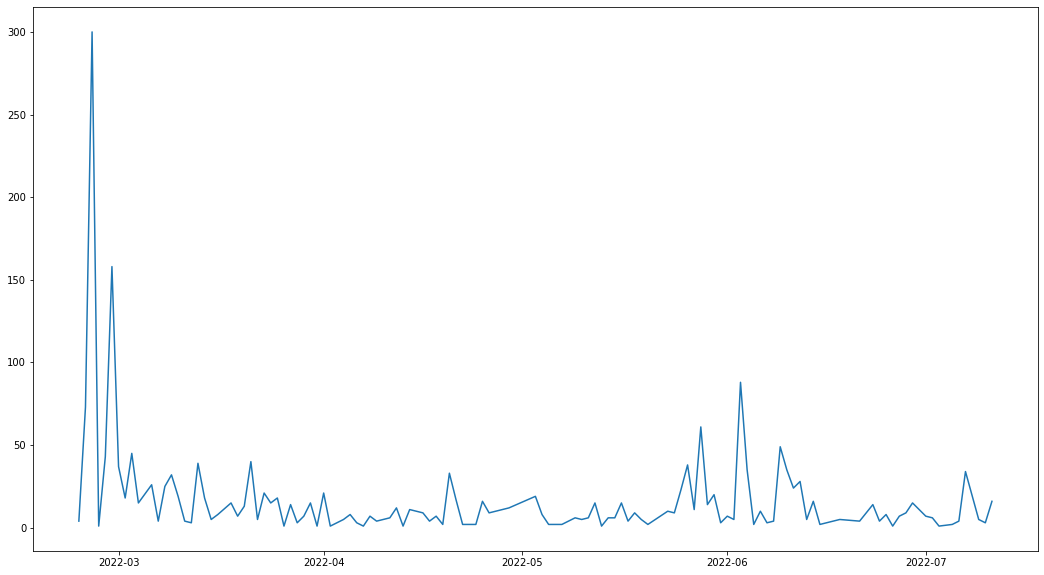

In [165]:
plt.figure(figsize=(18,10))
plt.plot(Daily_Timeline['dates'],Daily_Timeline['message'])

In [166]:
df['day_name'] = df['date'].dt.day_name()

In [168]:
df['day_name'].value_counts()

Friday       552
Monday       346
Thursday     344
Wednesday    213
Sunday       200
Tuesday      184
Saturday     178
Name: day_name, dtype: int64

In [169]:
df['month'].value_counts()

February    579
March       473
June        380
May         304
April       203
July         78
Name: month, dtype: int64

In [170]:
import seaborn as sns

In [172]:
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation="horizontal")
plt.show()

KeyError: 'period'

<Figure size 1440x432 with 0 Axes>